In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pds

In [4]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aglfn epstool fonts-droid-fallback fonts-noto-mono ghostscript gnuplot-data
  gnuplot-qt gsfonts imagemagick-6-common info install-info libamd2
  libauthen-sasl-perl libcamd2 libccolamd2 libcholmod3 libcolamd2
  libcupsfilters1 libcupsimage2 libcxsparse3 libdata-dump-perl libemf1
  libencode-locale-perl libfftw3-single3 libfile-listing-perl libfltk-gl1.3
  libfltk1.3 libfont-afm-perl libgail-common libgail18 libglpk40
  libgraphicsmagick++-q16-12 libgraphicsmagick-q16-3 libgs9 libgs9-common
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libhtml-form-perl
  libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl
  libhtml-tree-perl libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-mess

# FIR Filter Design

Este é um problema tão importante quanto difícil. No processamento de sinais digitais, existem dois tipos importantes de sistemas. O primeiro tipo de sistema realiza filtragem de sinal no domínio do tempo e, portanto, é chamado de filtro digital. O segundo tipo de sistema fornece uma representação do sinal no domínio da frequência e é chamado de analisador de espectro. No Capítulo 5, descrevemos representações de sinais usando DFT. Neste capítulo e no próximo, estudaremos vários algoritmos básicos de projeto para filtros FIR e IIR. Esses projetos são principalmente do tipo seletivo de frequência; ou seja, iremos projetar principalmente filtros passa-baixa, passa-alta, passa-banda e notch multibanda. No projeto de filtros FIR, também consideraremos sistemas como diferenciadores ou transformadores de Hilbert, que, embora não sejam filtros seletivos de frequência, seguem as técnicas de projeto consideradas. 

## 7.1 PRELIMINARES

O projeto de um filtro digital é realizado em três etapas

• Especificações: Antes de projetar o filtro, devemos ter algumas especificações. Essas especificações são determinadas pelo aplicativo.
• Aproximação: Uma vez determinadas as especificações, utilizamos vários conceitos e matemáticas que estudamos até agora para dar uma descrição aproximada do filtro ao conjunto de especificações fornecidas. Esta etapa é o assunto do projeto do filtro.
• Implementação: O produto da etapa acima é uma descrição de filtro na forma de uma equação diferencial, ou uma função de sistema H, ou resposta ao impulso h.

Em muitas aplicações, como fala ou processamento de sinal de áudio, filtros digitais são usados para implementar operações seletivas de frequência. Portanto, são necessárias especificações no domínio da frequência em termos do tamanho necessário e da resposta de fase do filtro. Em geral, uma resposta de fase linear na banda passante é desejada. No caso dos filtros FIR, é possível ter uma fase linear exata, como vimos no Capítulo 6. No caso dos filtros IIR, a fase linear na banda passante não é alcançável. Portanto, consideraremos apenas as especificações de tamanho.
As especificações de tamanho são fornecidas de duas maneiras. A primeira abordagem é chamada de especificações absolutas, que fornecem um conjunto de requisitos para uma função de resposta de tamanho |H|. Essas especificações são geralmente usadas para filtros FIR. Os filtros IIR são especificados de uma maneira ligeiramente diferente, que discutimos no Capítulo 8. A segunda abordagem é chamada de especificação relativa, que fornece requisitos em decibéis dados \begin{equation} dB \hspace{1mm} scale = -20log_{10}\frac{|H(e^{ej})|}{|H(e^{ej})|_{max}} \geq 0 \end{equation}

## 7.2 PROPRIEDADES DOS FILTROS FIR DE FASE LINEAR

In this section we discuss shapes of impulse and frequency responses and
locations of system function zeros of linear-phase FIR filters. Let $h(n),
0 ≤ n ≤ M − 1$ be the impulse response of length (or duration) M. Then
the system function is
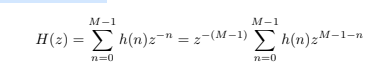


### 7.2.1 RESPOSTA AO IMPULSO
Nós impomos uma restrição de fase linear $ H(ejω) = −αω, −π<ω ≤ π $

M ímpar: Neste caso α = (M −1)/2 é um número inteiro. A resposta ao impulso
é como mostrado abaixo.

M par: Neste caso α = (M − 1)/2 não é um número inteiro. o impulso
resposta é como mostrado aqui.

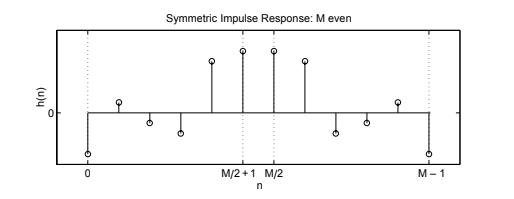



### 7.2.2 RESPOSTA DE FREQUÊNCIA $ H(ejω) $

Quando os casos simétricos e antisimétricos são combinados com M ímpar e M par, obtemos quatro tipos de filtros FIR de fase linear. As funções de resposta de frequência para cada uma delas têm algumas expressões e formas especiais. Para estudar essas reações, escrevemos $ H(ejω) $ como:

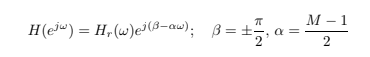

**Filtro FIR de fase linear tipo 1:** resposta de impulso simétrica,
M ímpar Neste caso $ β = 0, α = (M − 1)/2 $ é um inteiro, e $ h(n) =
h(M − 1 − n), 0 ≤ n ≤ M − 1 $. 

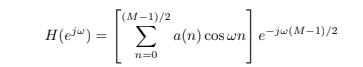

**Filtro FIR de fase linear tipo 2:** resposta de impulso simétrica,
M mesmo Neste caso novamente $ β =0, h(n) = h(M−1−n), 0 ≤ n ≤ M−1 $,
mas $α = (M−1)/2$ não é um número inteiro. Então podemos mostrar este:

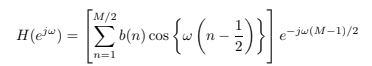

**Filtro FIR de fase linear tipo 3:** resposta impulsiva antissimétrica,
M ímpar Neste caso $β = π/2, α = (M − 1)/2$ é um número inteiro, $h(n) =
−h(M − 1 − n), 0 ≤ n ≤ M − 1, e h((M − 1)/2) = 0 $. Então podemos
mostrar:

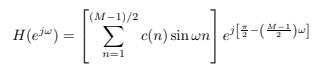

**Filtro FIR de fase linear tipo 4:** resposta impulsiva antisimétrica,
M par Este caso é semelhante ao Tipo-2. Nós temos:

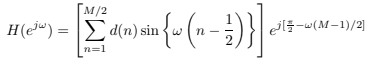


## 7.3 TÉCNICAS DE PROJETO DE JANELA

A ideia básica do projeto de janela é selecionar o filtro seletivo de frequência ideal correto e, em seguida, truncar sua resposta ao impulso para obter um filtro FIR linear e causal. Portanto, neste método, a ênfase está na escolha de uma função de janela adequada e um filtro ideal adequado. Vamos denotar um filtro seletivo de frequência ideal como Hd, que tem ganho unitário na banda passante e uma característica de fase linear e resposta zero na banda proibida. Um LPF ideal com largura de banda c < é dado por:

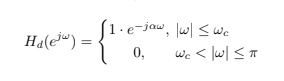

1. Como a janela $w(n)$ tem um comprimento finito igual a M, sua resposta tem
um lóbulo principal pontiagudo cuja largura é proporcional a 1/M, e tem lado
lóbulos de alturas menores.

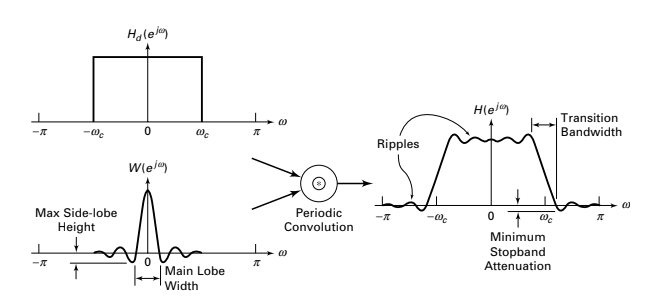

2. A convolução periódica produz uma versão manchada do ideal
resposta $Hd(ejω)$.
3. O lóbulo principal produz uma banda de transição em $H(ejω)$ cuja largura é
responsável pela largura de transição. Esta largura é então proporcional a
1/M. Quanto mais largo for o lóbulo principal, mais larga será a largura de transição.
4. Os lóbulos laterais produzem ondulações que têm formas semelhantes em ambos os lados banda passante e banda de parada.

**Idéia básica de design de janela** Para as especificações de filtro fornecidas, escolha o comprimento do filtro M e a função de janela w para a largura do lóbulo principal mais estreita possível e a menor atenuação do lóbulo lateral.
Da observação 4, notamos que a tolerância de passagem de banda 1 e a tolerância de banda de parada 2 não podem ser determinadas independentemente. Normalmente lidamos com 2 sozinho, o que resulta em 2 = 1. Agora descrevemos brevemente várias funções de janela bem conhecidas. Usaremos a janela retangular como exemplo para examinar seu desempenho no domínio da frequência.



### 7.3.1 Janela Retângular

Esta é a função de janela mais simples, mas fornece o pior desempenho
do ponto de vista da atenuação da banda de parada. Foi definido anteriormente por:

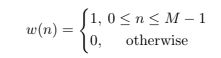

Sua função de resposta em frequência é:

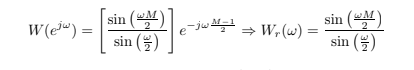

que é a resposta de amplitude. De a amplitude real
a resposta$ Hr (ω)$ é dada por:

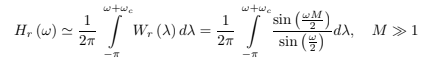

Isso implica que a integral contínua da resposta de amplitude da janela é necessária na análise precisa da largura de banda de transição e da atenuação da banda de parada. A Figura 7.9 mostra a função de janela retangular w , sua resposta de amplitude W , resposta de amplitude em $dB$ e resposta de amplitude cumulativa em $dB$. A partir da observação dos gráficos da Figura 7.9, podemos fazer algumas observações.

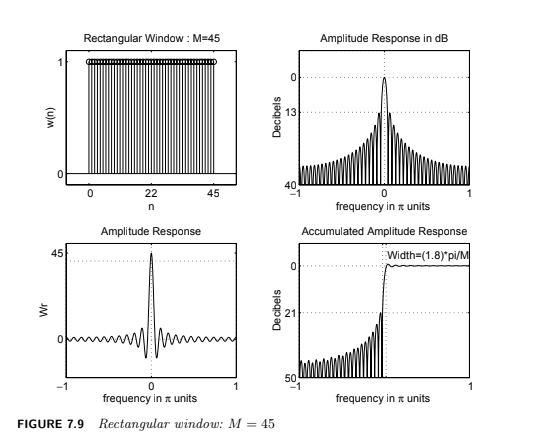

### 7.3.2 JANELA DE BARTLETT
Como o fenômeno de Gibbs resulta do fato de que o retângulo
janela tem uma transição repentina de 0 para 1 (ou 1 para 0), sugeriu Bartlett
uma transição mais gradual na forma de uma janela triangular, que é
dado por:

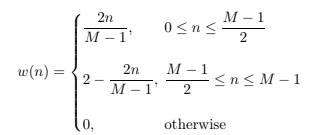

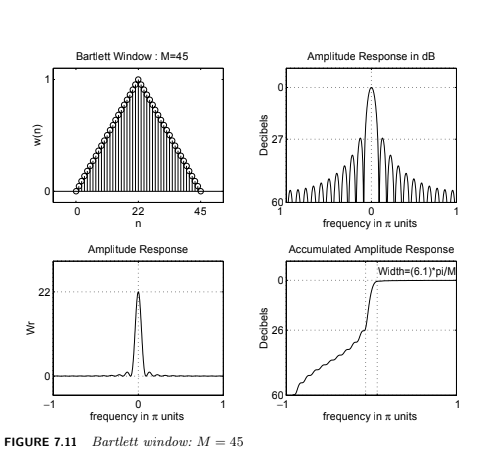

### 7.3.3 JANELA DE HANN
Esta é uma função de janela de cosseno levantada dada por:
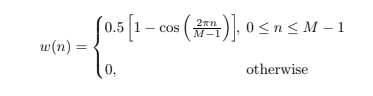

### 7.3.4 JANELA DE MARTELO
Esta janela é semelhante à janela Hann, exceto que tem um pequeno
quantidade de descontinuidade e é dada por

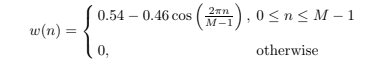

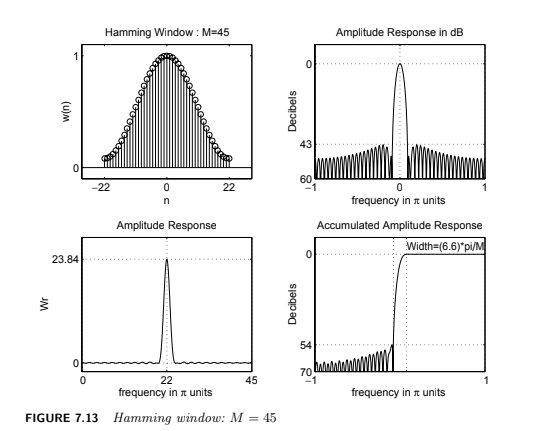



### 7.3.5 JANELA DO BLACKMAN
Esta janela também é semelhante às duas anteriores, mas contém uma segunda
termo harmônico e é dado por

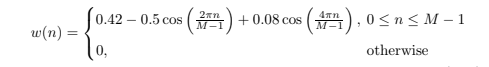

### 7.3.6 JANELA KAISER
Esta é uma função de janela ajustável que é amplamente utilizada na prática. o
função de janela é devida a J. F. Kaiser e é dada por:

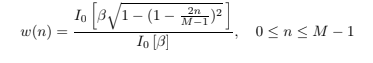

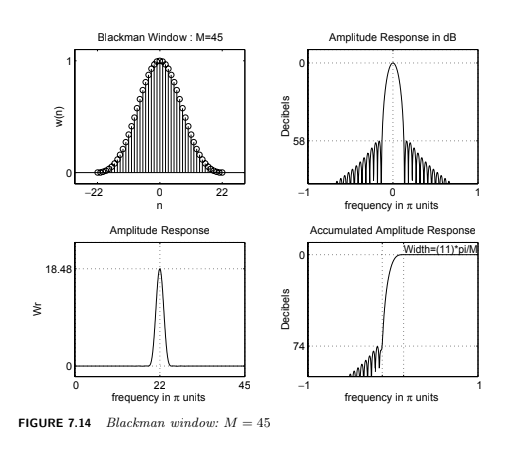

### Visão Geral

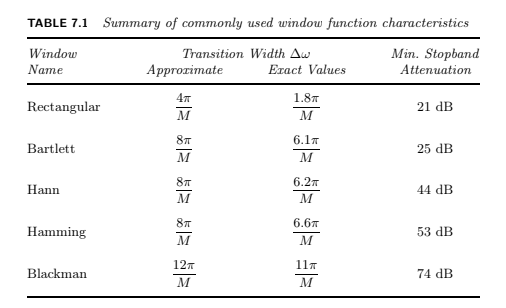

• se β = 5,658, então a largura de transição é igual a 7,8π/M, e o
a atenuação mínima da banda de parada é igual a 60 dB. Isso é mostrado em
Figura 7.15.

• se β = 4,538, então a largura de transição é igual a 5,8π/M, e o
a atenuação mínima da banda de parada é igual a 50 dB.

Portanto, o desempenho dessa janela é comparável ao da janela de Hamming. Além disso, a janela Kaiser fornece larguras de banda de passagem flexíveis. Devido à complexidade envolvida nas funções de Bessel, derivar as equações de projeto para esta janela não é fácil. Felizmente, a Kaiser desenvolveu as equações de projeto empíricas que fornecemos aqui.

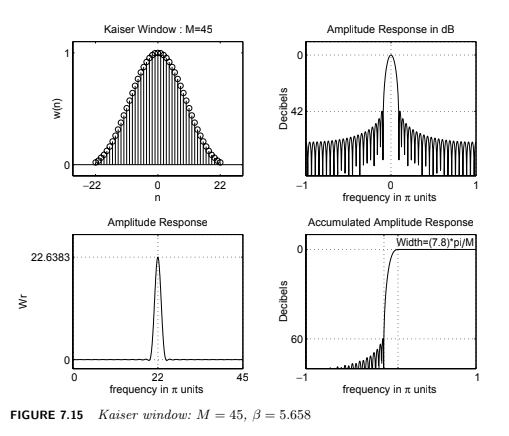


In [ ]:
%%writefile ex7-9.m

function hd = ideal_lp(wc,M);
% Ideal LowPass filter computation
% --------------------------------
% [hd] = ideal_lp(wc,M)
% hd = ideal impulse response between 0 to M-1
% wc = cutoff frequency in radians
% M = length of the ideal filter
%
alpha = (M-1)/2; n = [0:1:(M-1)];
m=n- alpha; fc = wc/pi; hd = fc*sinc(fc*m);
end

function [db,mag,pha,grd,w] = freqz_m(b,a);
% Modified version of freqz subroutine
% ------------------------------------
% [db,mag,pha,grd,w] = freqz_m(b,a);
% db = Relative magnitude in dB computed over 0 to pi radians
% mag = absolute magnitude computed over 0 to pi radians
% pha = Phase response in radians over 0 to pi radians
% grd = Group delay over 0 to pi radians
% w = 501 frequency samples between 0 to pi radians
% b = numerator polynomial of H(z) (for FIR: b=h)
% a = denominator polynomial of H(z) (for FIR: a=[1])
%
[H,w] = freqz(b,a,1000,'whole');
H = (H(1:1:501))''; w = (w(1:1:501))';
mag = abs(H); db = 20*log10((mag+eps)/max(mag));
pha = angle(H); grd = grpdelay(b,a,w);
end 

wp = 0.2*pi; ws = 0.3*pi; As = 50; tr_width = ws - wp;
M = ceil((As-7.95)/(2.285*tr_width)+1) + 1
M = 61
n=[0:1:M-1]; beta = 0.1102*(As-8.7)
beta = 4.5513
wc = (ws+wp)/2; hd = ideal_lp(wc,M);
w_kai = (kaiser(M,beta))'; h = hd .* w_kai;
[db,mag,pha,grd,w] = freqz_m(h,[1]); delta_w = 2*pi/1000;
As = -round(max(db(ws/delta_w+1:1:501))) % Min Stopband Attenuation

Overwriting ex7-9.m


In [ ]:
!octave -W ex7-9.m

M =  61
M =  61
beta =  4.5513
beta =  4.5513
which seems to not be installed in your system.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'kaiser' undefined near line 38 column 10
error: called from
    ex7-9.m at line 38 column 7


## 7.4 TÉCNICAS DE PROJETO DE AMOSTRAGEM DE FREQUÊNCIA

In this design approach, we make use of the fact that the system function H can be obtained from the H samples of the H frequency response.
Furthermore, this design technique fits nicely with the take structure. frequency patterns that we discussed in Chapter 6.

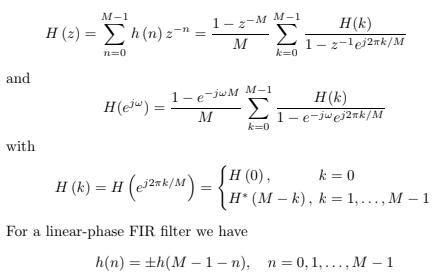

Ideia básica Dado o filtro passa-baixa ideal $ Hd(ejω) $, escolha o filtro
comprimento M e então amostrar Hd(ejω) em M frequências equiespaçadas entre
$0 e 2π$. A resposta real $H(ejω)$ é a interpolação das amostras
$H(k)$ dado por (7.34). Isso é mostrado na Figura 7.25. A resposta ao impulso
é dada por (7.39). Etapas semelhantes se aplicam a outros filtros seletivos de frequência. Além disso, essa ideia também pode ser estendida para aproximar valores arbitrários especificações no domínio da frequência.

1. O erro de aproximação - isto é, a diferença entre o ideal e o
a resposta real - é zero nas frequências amostradas.
2. O erro de aproximação em todas as outras frequências depende da forma
da resposta ideal; ou seja, quanto mais aguda a resposta ideal, maior
o erro de aproximação.
3. O erro é maior perto das bordas da banda e menor dentro da banda.

Existem duas abordagens de design. Na primeira abordagem, usamos literalmente a ideia básica e não fornecemos nenhuma restrição ao erro de aproximação; ou seja, aceitamos qualquer erro que recebemos do design. Essa abordagem é chamada de método de design ingênuo. Na segunda abordagem, tentamos minimizar o erro na banda de parada variando os valores das amostras da banda de transição. Isso resulta em um projeto muito melhor chamado de método de projeto ideal.

### 7.4.1 MÉTODO DE DESIGN NAIVE
Neste método, definimos $H(k) = Hd(ej2πk/M), k = 0,...,M − 1$ 

In [ ]:
%%writefile ex7-14.m

subplot(2,2,2); stem(l,h); axis([-1,M,-0.1,0.3])
title('Impulse Response'); xlabel('n'); ylabel('h(n)');
subplot(2,2,3); plot(ww/pi,Hr,wl(1:11)/pi,Hrs(1:11),'o');
axis([0,1,-0.2,1.2]); title('Amplitude Response')
xlabel('frequency in pi units'); ylabel('Hr(w)')
subplot(2,2,4);plot(w/pi,db); axis([0,1,-60,10]); grid
title('Magnitude Response'); xlabel('frequency in pi units');
ylabel('Decibels');

Overwriting ex7-14.m


In [ ]:
!octave -W ex7-14.m

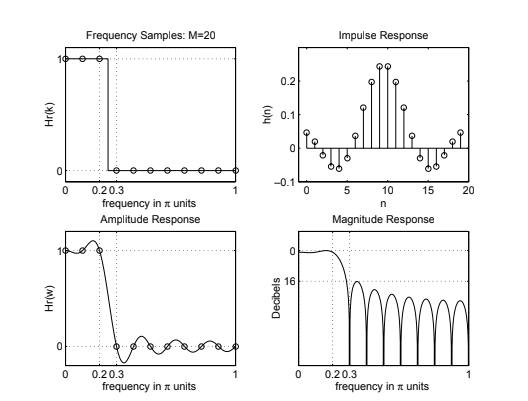

### 7.4.2 MÉTODO DE PROJETO ÓTIMO

Para obter mais atenuação, precisaremos aumentar M e tornar as amostras de banda passante amostras grátis - ou seja, alteraremos seus valores para obter a maior atenuação para o M dado e a largura de transição.
Este problema é conhecido como problema de otimização e é resolvido usando técnicas de programação linear. Usando o exemplo abaixo, demonstramos o efeito da variação da amostra de banda passante no projeto.

In [ ]:
%%writefile ex7-15.m

% T1 = 0.5
M = 40; alpha = (M-1)/2;
Hrs = [ones(1,5),0.5,zeros(1,29),0.5,ones(1,4)];
k1 = 0:floor((M-1)/2); k2 = floor((M-1)/2)+1:M-1;
 angH = [-alpha*(2*pi)/M*k1, alpha*(2*pi)/M*(M-k2)];
H = Hrs.*exp(j*angH);
h = real(ifft(H,M));

% T1 = 0.39
M = 40; alpha = (M-1)/2;
Hrs = [ones(1,5),0.39,zeros(1,29),0.39,ones(1,4)];
k1 = 0:floor((M-1)/2); k2 = floor((M-1)/2)+1:M-1;
angH = [-alpha*(2*pi)/M*k1, alpha*(2*pi)/M*(M-k2)];
H = Hrs.*exp(j*angH); h = real(ifft(H,M));

Writing ex7-15.m


In [ ]:
!octave -W ex7-15.m

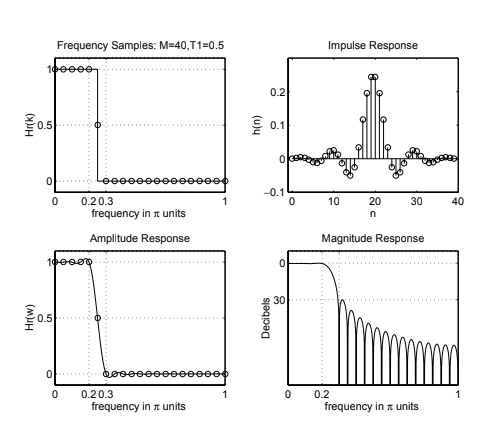

## 7.5 TÉCNICA DE PROJETO DE EQUILÍBRIO IDEAL

As duas últimas técnicas - ou seja, o design da janela e a frequência
projeto de amostragem - eram fáceis de entender e implementar. No entanto, eles
têm algumas desvantagens. Primeiro, não podemos especificar as frequências da banda
ωp e ωs precisamente no projeto; ou seja, temos que aceitar o que quer que seja
valores que obtemos após o projeto. Em segundo lugar, não podemos especificar δ1 e
δ2 fatores de ondulação simultaneamente. Ou temos δ1 = δ2 na janela
método de design, ou podemos otimizar apenas δ2 na amostragem de frequência
método. Finalmente, o erro de aproximação - ou seja, a diferença entre
a resposta ideal e a resposta real - não é distribuída uniformemente
sobre os intervalos de banda. É maior perto das bordas da banda e menor em
as regiões distantes das bordas da banda. Distribuindo o erro uniformemente,
podemos obter um filtro de ordem inferior satisfazendo as mesmas especificações. Para-
Felizmente, existe uma técnica que pode eliminar esses três problemas. Esse
técnica é um pouco difícil de entender e requer um computador
para sua implementação.

Para filtros FIR de fase linear é possível derivar um conjunto de condições sob as quais a solução de projeto pode ser ótima em termos de minimização do erro máximo de aproximação. Filtros com esta propriedade são chamados de filtros de igualdade porque o erro de aproximação é distribuído uniformemente tanto na banda passante quanto na banda proibida. Isso resulta em filtros de ordem inferior.
A seguir, primeiro formulamos um problema de projeto FIR ótimo minimax e discutimos o número total de máximos e mínimos que podem ser obtidos na resposta de amplitude de um filtro FIR de fase linear.
Algoritmo de projeto de filtro FIR usando interpolação polinomial para sua solução. Este algoritmo é conhecido como algoritmo de Parks-McClellan e inclui o algoritmo de troca de Remez para solução polinomial. Este algoritmo está disponível como um subprograma em muitas plataformas de computação. Nesta seção, usaremos o MATLAB para projetar filtros FIR de igualdade.

## 7.5.1 DEVELOPMENT OF THE MINIMAX PROBLEM
Earlier in this chapter we showed that the frequency response of the four
cases of linear-phase FIR filters can be written in the form:

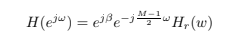

O objetivo da análise anterior era ter uma forma comum
para $Hr(ω)$ em todos os quatro casos. Isso torna a formulação do problema muito
mais fácil. Para formular nosso problema como um problema de aproximação de Chebyshev,
temos que definir a resposta de amplitude desejada $Hdr(ω)$ e uma ponderação
função W(ω), ambas definidas sobre bandas passantes e bandas de parada. O peso-função de controle é necessária para que possamos ter um controle independente sobre $δ1 e δ2$. O erro ponderado é definido como:

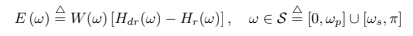

**Declaração do problema**: O problema de aproximação Chebyshev pode agora
ser definido como:
Determine o conjunto de coeficientes $a(n) \hspace{2mm} ou \hspace{2mm} \bar{b}(n) \hspace{2mm} ou \hspace{2mm} \bar{c}(n) \hspace{2mm} ou \hspace{2mm} \bar{d}(n) $ [ou equivalente
lentamente $a(n) \hspace{2mm} ou \hspace{2mm} b(n) \hspace{2mm} ou \hspace{2mm} c(n) \hspace{2mm} ou \hspace{2mm} d(n)$] para minimizar o máximo absoluto
valor de $E (ω)$ sobre a banda passante e a banda proibida, ou seja:

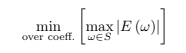

### 7.5.2 RESTRIÇÃO NO NÚMERO DE EXTREMA
Antes de dar a solução para este problema acima, vamos primeiro discutir
a questão: quantos máximos e mínimos locais existem na função de erro
ção $E(ω)$ para um dado filtro de ponto M? Esta informação é utilizada pelo
Algoritmo de Parks-McClellan para obter a interpolação polinomial. o
a resposta está na expressão $P(ω)$.

TEOREMA 1 Teorema da Alternação

Seja S qualquer subconjunto fechado do intervalo fechado $[0, π]$. Para que
$P(ω)$ seja a única aproximação minimax para $Hdr(ω)$ em S, é necessário
e suficiente que a função de erro $E(ω)$ exiba pelo menos (L + 2) “alter-
nações” ou frequências extremas em S; ou seja, deve existir (L + 2)
frequências ωi em S tais que:

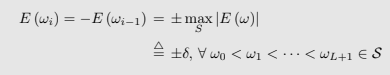

### 7.5.3 ALGORITMO PARKS-McCLELLAN

O teorema da alternância garante que a solução para nossa aproximação minimax
problema de aproximação existe e é único, mas não nos diz como

para obter esta solução. Não conhecemos nem a ordem M (ou equivalentemente,
L), nem as frequências extremas ωi, nem os parâmetros {α(n)}, nem os
erro máximo δ. Parks e McClellan [20] forneceram uma solução iterativa
usando o algoritmo de troca Remez. Ele assume que o comprimento do filtro M
(ou L) e a relação δ2/δ1 são conhecidos. Se escolhermos a função de ponderação
como em (7.43), e se escolhermos a ordem M corretamente, então δ = δ2 quando
a solução é obtida. Claramente, δ e M estão relacionados; quanto maior o M,
quanto menor for o δ. Nas especificações do filtro δ1, δ2, ωp e ωs são dados.
Portanto, M deve ser assumido. Felizmente, uma fórmula simples, devido
Kaiser, existe para aproximar M. É dado por:

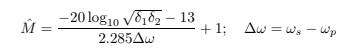

Os erros máximos locais são determinados em uma grade mais fina e as frequências extremas {i} são ajustadas nesses novos valores extremos. Um novo polinômio de ordem L é ajustado a partir dessas novas frequências e o procedimento é repetido. Essa iteração continua até que o conjunto ótimo {i} e o erro máximo geral sejam encontrados. O procedimento iterativo é garantido para convergir e produz o polinômio P. Ele é determinado a partir dos coeficientes β. Finalmente, os coeficientes a e resposta ao impulso h são calculados. Este algoritmo está disponível como a função firpm brevemente descrita no MATLAB



In [1]:
%%writefile ex7-23.m

[h] = firpm(N,f,m,weights,ftype)
[N,f0,m0,weights] = firpmord(f,m,delta);

wp = 0.2*pi; ws = 0.3*pi; Rp = 0.25; As = 50;
[delta1,delta2] = db2delta(Rp,As);
[N,f,m,weights] = firpmord([wp,ws]/pi,[1,0],[delta1,delta2]);
h = firpm(N,f,m,weights);
[db,mag,pha,grd,w] = freqz_m(h,[1]);
delta_w = 2*pi/1000; wsi=ws/delta_w+1; wpi = wp/delta_w;
Asd = -max(db(wsi:1:501))
Asd = 47.8404
N = N+1
N = 43
h = firpm(N,f,m,weights); [db,mag,pha,grd,w] = freqz_m(h,[1]);
Asd = -max(db(wsi:1:501))
Asd = 48.2131
N = N+1
N = 44
h = firpm(N,f,m,weights); [db,mag,pha,grd,w] = freqz_m(h,[1]);
Asd = -max(db(wsi:1:501))
Asd = 48.8689
N = N+1
N = 45
h = firpm(N,f,m,weights); [db,mag,pha,grd,w] = freqz_m(h,[1]);
Asd = -max(db(wsi:1:501))
Asd = 49.8241
N = N+1
N = 46
h = firpm(N,f,m,weights); [db,mag,pha,grd,w] = freqz_m(h,[1]);
Asd = -max(db(wsi:1:501))
Asd = 51.0857
M = N+1
M = 47

Writing ex7-23.m


In [6]:
!octave -W ex7-23.m

error: 'N' undefined near line 2 column 12
error: called from
    ex7-23.m at line 2 column 4
